In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import  seaborn as sns
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

df = pd.read_csv("/content/dataset.csv")

In [10]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [14]:
df.shape

(22000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [8]:
df.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [9]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [16]:
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [27]:
x = np.array(df['Text'])
y = np.array(df['language'])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [33]:
count_vect = CountVectorizer()

In [34]:
X = count_vect.fit_transform(x)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [36]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [37]:
model.score(X_test, y_test)

0.9544077134986226

In [38]:
pred=model.predict(X_test)
pred

array(['Korean', 'Latin', 'Indonesian', ..., 'Arabic', 'Persian',
       'Pushto'], dtype='<U10')

In [39]:
y_test

array(['Korean', 'Latin', 'Indonesian', ..., 'Arabic', 'Persian',
       'Pushto'], dtype=object)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9544077134986226
[[341   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 192   1  40   0   1   0   0 106   0   1   0   0   0   1   0   3   1
    0   0   1   0]
 [  0   0 306   1   0   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 337   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   9 328   1   0   0   0   0   0   0   0   0   0   3   0   0
    0   0   0   0]
 [  0   0   0   1   0 339   0   0   0   0   0   0   1   0   0   0   1   0
    0   0   0   0]
 [  0   0   0   4   0   0 328   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   8   0   0   0 322   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  10   1  21   1   5   1   0 277   0   1   0   2   0   0   1   4   1
    0   0   1   0]
 [  0   0   0   1   0   0   0   0   4 332   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   2  28   0   4   0   0   0   0 285   0  

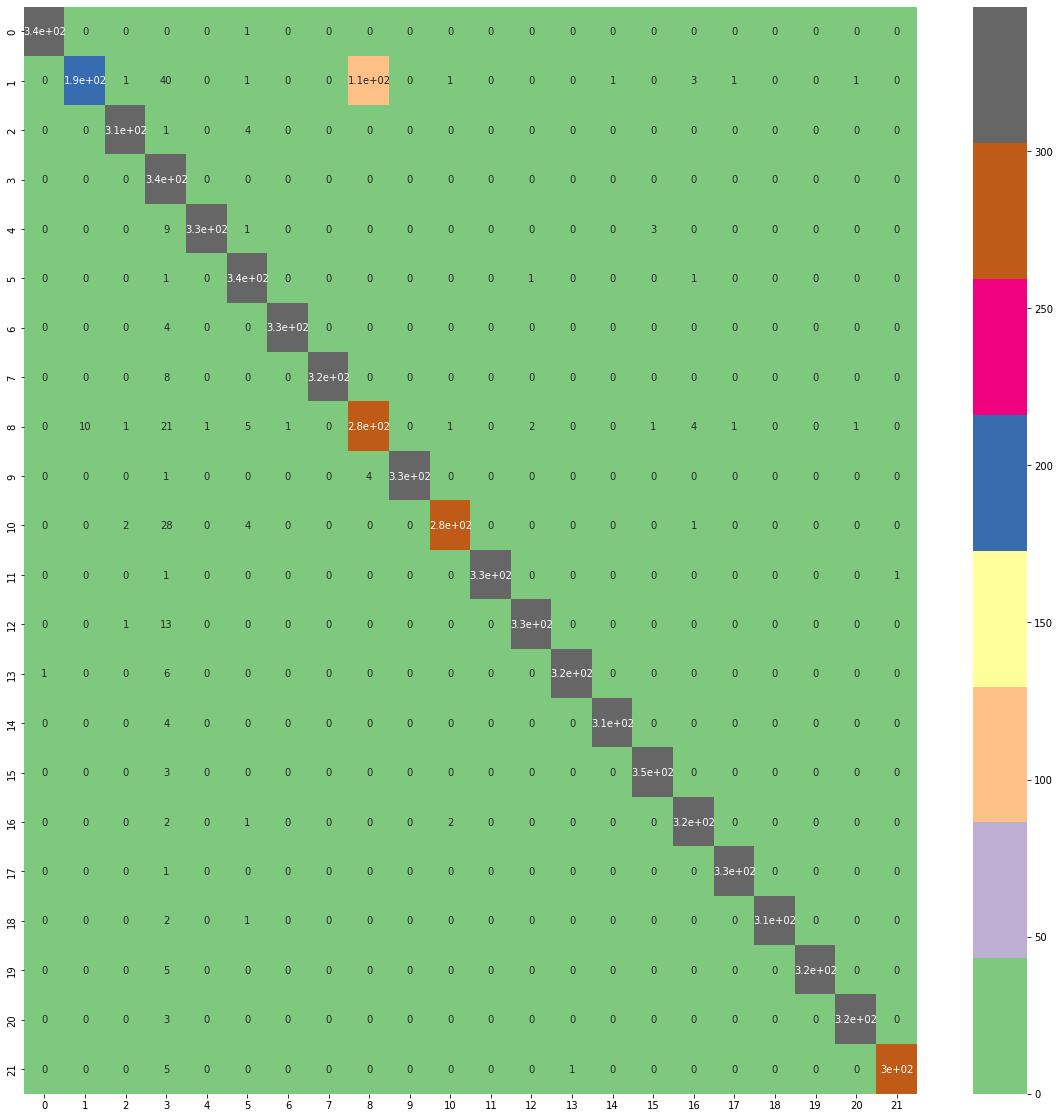

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

In [44]:
final = pd.DataFrame(np.c_[y_test,pred],columns=['Actual','Predicted'])
final

,Actual,Predicted
0,Korean,Korean
1,Latin,Latin
2,Indonesian,Indonesian
3,Urdu,Urdu
4,Persian,Persian
...,...,...
7255,Hindi,Hindi
7256,Korean,Korean
7257,Arabic,Arabic
7258,Persian,Persian


In [46]:
import joblib

joblib.dump(count_vect , 'language_identification.sav')

['language_identification.sav']

In [47]:
model_predect = joblib.load('language_identification.sav')

In [48]:
def test_model(test_sentence):
    languages = {
    'Arabic' : 0,
    'Chinese' : 1,
    'Dutch' : 2,
    'English' : 3,
    'Estonian' : 4,
    'French' : 5,
    'Hindi' : 6,
    'Indonesian' : 7,
    'Japanese' : 8,
    'Korean' : 9,
    'Latin' : 10,
    'Persian' : 11,
    'Portugese' : 12,
    'Pushto' : 13,
    'Romanian' : 14,
    'Russian' : 15,
    'Spanish' : 16,
    'Swedish' : 17,
    'Tamil' : 18,
    'Thai' : 19,
    'Turkish' : 20,
    'Urdu' : 21
    }
    
    
    
    
    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)
    
    rev = cv.transform([rev]).toarray()
    
    output = model.predict(rev)[0]
    
    keys = list(languages)
    values = list(languages.values())
    position = values.index(output)
    
    output = keys[position]
    
    print(output)

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
ps = PorterStemmer()
corpus=[]

for i in range(len(df['Text'])):
    

    rev = re.sub("^[a-zA-Z]",' ', df['Text'][i]) 
#print(rev)
    rev = rev.lower()
#print(rev)
    rev = rev.split()
#print(rev)
    rev = [ps.stem(word) for word in rev if set(stopwords.words())]
#print(rev)
    rev = ' '.join(rev)
#print(rev)
    corpus.append(rev)
#print(rev)  


KeyboardInterrupt: ignored